In [1]:
!sudo apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [53.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [2]:
!export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}

In [3]:
!export LD_LIBRAY_PATH=/usr/local/cuda/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}

In [4]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14997, done.
remote: Total 14997 (delta 0), reused 0 (delta 0), pack-reused 14997
Receiving objects: 100% (14997/14997), 13.38 MiB | 19.52 MiB/s, done.
Resolving deltas: 100% (10194/10194), done.


In [5]:
import os
os.chdir('/content/darknet')

In [6]:
!pwd

/content/darknet


In [7]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
./src/http_stream.cpp: In function ‘void set_track_id(detection*, int, float, float, float, int, int, int)’:
./src/http_stream.cpp:867:27: warning: comparison between signed and unsigned integer expressions [-Wsign-compare]
         for (int i = 0; i < v.size(); ++i) {
                         ~~^~~~~~~~~~
./src/http_stream.cpp:875:33: warning: c

In [8]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-05-05 07:05:36--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  39.4MB/s    in 6.4s    

2021-05-05 07:05:43 (36.9 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [9]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2021-05-05 07:05:43--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  26.7MB/s    in 1.3s    

2021-05-05 07:05:45 (26.7 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [10]:
!ls

3rdparty		darknet_video.py       README.md
backup			data		       results
build			image_yolov3.sh        scripts
build.ps1		image_yolov4.sh        src
cfg			include		       vcpkg.json
cmake			json_mjpeg_streams.sh  video_yolov3.sh
CMakeLists.txt		LICENSE		       video_yolov4.sh
darknet			Makefile	       yolov3-tiny.weights
DarknetConfig.cmake.in	net_cam_v3.sh	       yolov3.weights
darknet_images.py	net_cam_v4.sh
darknet.py		obj


In [11]:
!sudo apt-get install vim

Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [12]:
!sed -i 's/GPU=0/GPU=1/g' Makefile

In [ ]:
# !sudo vim Makefile

In [13]:
!./darknet detect /content/darknet/cfg/yolov3.cfg /content/darknet/yolov3.weights /content/darknet/data/dog.jpg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

In [ ]:
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

In [ ]:
!cmake -DOPENCV_EXTRA_MODULES_PATH=/content/opencv_contrib/modules \
      -DBUILD_SHARED_LIBS=OFF \
      -DBUILD_TESTS=OFF \
      -DBUILD_PERF_TESTS=OFF \
      -DBUILD_EXAMPLES=OFF \
      -DWITH_OPENEXR=OFF \
      -DWITH_CUDA=ON \
      -DWITH_CUBLAS=ON \
      -DWITH_CUDNN=ON \
      -DOPENCV_DNN_CUDA=ON \
      /content/opencv

In [14]:
os.chdir('/content')
from google.colab import files
uploaded = files.upload()

Saving selfie.jpeg to selfie.jpeg


In [15]:
os.chdir('/content/darknet/')

In [16]:
!pwd

/content/darknet


In [17]:
!./darknet detect /content/darknet/cfg/yolov3.cfg /content/darknet/yolov3.weights /content/selfie.jpeg

 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

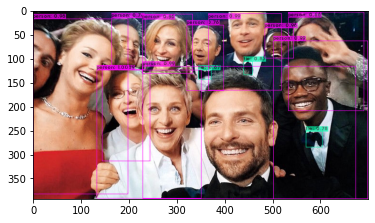

In [20]:
import cv2
import matplotlib.pyplot as plt
import os.path

fig, ax = plt.subplots()
file = '/content/darknet/predictions.jpg'

if os.path.exists(file):
  img = cv2.imread(file)
  show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(show_img)